# Data

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from speasy.core.requests_scheduling.request_dispatch import init_cdaweb
from space_analysis.ds.spz.plot import spz_plot

## Parker Solar Probe data
The parameters are:

- 'psp_fld_l2_mag_RTN_4_Sa_per_Cyc' (B in RTN, 0.25s resolution)
- 'psp_swp_spi_sf00_L3_DENS' (Ion density, regular resolution)
- 'psp_swp_spi_af00_L3_DENS' (Ion density, burst resolution)
- 'psp_swp_spi_sf00_L3_VEL_RTN_SUN' (velocity in RTN in Sun's frame, regular resolution)
- 'psp_swp_spi_af00_L3_VEL_RTN_SUN' (velocity in RTN in Sun's frame, burst resolution)
- 'psp_swp_spi_sf00_L3_VEL_RTN' (velocity in RTN in spacecraft frame, regular resolution, you need this to calculate current sheet thickness)
- 'psp_swp_spi_af00_L3_VEL_RTN' (velocity in RTN in spacecraft frame, burst resolution, you need this to calculate current sheet thickness)
- 'Tp_spani_b' (Ion parallel and perpendicular ion temperature, regular resolution. Blue (first element in array): parallel, Red: perp)
- 'Tp_spanib_b' (Ion parallel and perpendicular ion temperature, burst resolution. Blue (first element in array): parallel, Red: perp)

In [2]:
from psp.io.psp import load_psp_data
from psp.plot import preview_psp_data

In [3]:
enc = 8

0 : psp_fld_l2_mag_RTN_4_Sa_per_Cyc
1 : psp_swp_spi_sf00_L3_DENS
2 : psp_swp_spi_sf00_L3_VEL_RTN_SUN
3 : psp_swp_spi_sf00_L3_VEL_RTN
4 : psp_swp_spi_af00_L3_DENS
5 : psp_swp_spi_af00_L3_VEL_RTN_SUN
6 : psp_swp_spi_af00_L3_VEL_RTN
7 : Tp_spani_b
8 : Tp_spanib_b


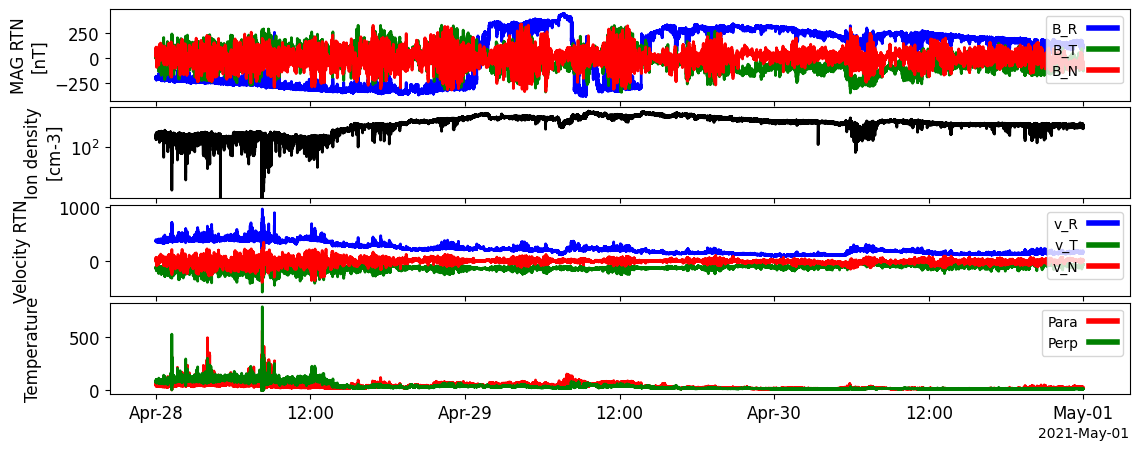

In [6]:
tnames = load_psp_data(enc)
preview_psp_data()

In [5]:
init_cdaweb()

In [6]:
tr = ["2021-04-28T23:00", "2021-04-29T07:00"]
products = [
    "cda/PSP_FLD_L2_MAG_RTN_1MIN/psp_fld_l2_mag_RTN_1min",
    "cda/PSP_SWP_SPI_SF00_L3_MOM/DENS",
    "cda/PSP_SWP_SPI_SF00_L3_MOM/VEL_RTN_SUN",
    "cda/PSP_SWP_SPI_SF00_L3_MOM/TEMP",
]
spz_plot(products, tr)

/Users/zijin/projects/psp_conjunction/.pixi/envs/default/lib/python3.11/site-packages/speasy/core/data_containers.py:17: UserWarning: no explicit representation of timezones available for np.datetime64
  return np.searchsorted(time, np.datetime64(key, 'ns'), side='left')


:Layout
   .Overlay.Psp_fld_l2_mag_RTN_1min :Overlay
      .NdOverlay.Psp_fld_l2_mag_RTN_1min :NdOverlay   [dim_1]
         :Curve   [time]   (psp_fld_l2_mag_RTN_1min)
   .Overlay.DENS                    :Overlay
      .Curve.DENS :Curve   [time]   (DENS)
   .Overlay.VEL_RTN_SUN             :Overlay
      .NdOverlay.VEL_RTN_SUN :NdOverlay   [dim_1]
         :Curve   [time]   (VEL_RTN_SUN)
   .Overlay.TEMP                    :Overlay
      .Curve.TEMP :Curve   [time]   (TEMP)

In [10]:
tr = ["2021-05-04T05:45:00", "2021-05-05T01:45:00"]
products = [
    "cda/SOLO_L2_MAG-RTN-NORMAL-1-MINUTE/B_RTN",
    "cda/SOLO_L2_SWA-PAS-GRND-MOM/N",
    "cda/SOLO_L2_SWA-PAS-GRND-MOM/V_RTN",
    "cda/SOLO_L2_SWA-PAS-GRND-MOM/T",
]
spz_plot(products, tr)

/Users/zijin/projects/psp_conjunction/.pixi/envs/default/lib/python3.11/site-packages/speasy/core/data_containers.py:17: UserWarning: no explicit representation of timezones available for np.datetime64
  return np.searchsorted(time, np.datetime64(key, 'ns'), side='left')


:Layout
   .Overlay.B_RTN :Overlay
      .NdOverlay.B_RTN :NdOverlay   [dim_1]
         :Curve   [time]   (B_RTN)
   .Overlay.N     :Overlay
      .Curve.N :Curve   [time]   (N)
   .Overlay.V_RTN :Overlay
      .NdOverlay.V_RTN :NdOverlay   [dim_1]
         :Curve   [time]   (V_RTN)
   .Overlay.T     :Overlay
      .Curve.T :Curve   [time]   (T)

## ARTEMIS data

- [ ] Why sometimes we don't have pressure tensor but have temperature tensor?

- THB_L2_MOM

  - `thb_peem_ptens_magQ` -----Electron Pressure Tensor, Field Aligned

  - `thb_peem_t3_magQ` -----Electron Temperature, Field Aligned (TprpFA1, TprpFA2, TparFA)

  - `thb_peim_ptens_magQ` -----Ion Pressure Tensor, Field Aligned

  - `thb_peim_t3_magQ` -----Ion Temperature, Field Aligned (TprpFA1, TprpFA2, TparFA)


## Processing Data

In [2]:
from psp.config import WindConfig, THEMISConfig, SoloConfig
from psp.config.psp import PSPConfig
from discontinuitypy.utils.plot import plot_candidates

In [3]:
init_cdaweb()

In [5]:
encs = [7, 8]
configs = [PSPConfig, THEMISConfig, WindConfig, SoloConfig]

for enc in encs:
    for cls in configs:
        try:
            cls(enc=enc).produce_or_load()
        except KeyError as e:
            print(
                f"Failed to produce {cls.__name__} for enc={enc} due to {e} not found in timerange"
            )
            continue

0 : psp_fld_l2_mag_RTN_4_Sa_per_Cyc
1 : psp_swp_spi_sf00_L3_DENS
2 : psp_swp_spi_sf00_L3_VEL_RTN_SUN
3 : psp_swp_spi_sf00_L3_VEL_RTN
4 : psp_swp_spi_af00_L3_DENS
5 : psp_swp_spi_af00_L3_VEL_RTN_SUN
6 : psp_swp_spi_af00_L3_VEL_RTN
7 : Tp_spani_b
8 : Tp_spanib_b
Failed to produce SoloConfig for enc=7 due to 'solo' not found in timerange
0 : psp_fld_l2_mag_RTN_4_Sa_per_Cyc
1 : psp_swp_spi_sf00_L3_DENS
2 : psp_swp_spi_sf00_L3_VEL_RTN_SUN
3 : psp_swp_spi_sf00_L3_VEL_RTN
4 : psp_swp_spi_af00_L3_DENS
5 : psp_swp_spi_af00_L3_VEL_RTN_SUN
6 : psp_swp_spi_af00_L3_VEL_RTN
7 : Tp_spani_b
8 : Tp_spanib_b


## Wind examples

2024-08-24 20:57:30.802 | INFO     | discontinuitypy.utils.plot:plot_candidates:265 - Candidates indices: [ 195  303  743 1332]


[(<Figure size 1200x500 with 1 Axes>,
  [<Axes: title={'center': '#Discontinuity properties# $L: 2422.06 \\mathrm{km}$, $j: -0.16 \\mathrm{nA/m}^2$'}, ylabel='$B$\n[nT LMN]'>]),
 (<Figure size 1200x500 with 1 Axes>,
  [<Axes: title={'center': '#Discontinuity properties# $L: 200.73 \\mathrm{km}$, $j: 1.63 \\mathrm{nA/m}^2$'}, ylabel='$B$\n[nT LMN]'>]),
 (<Figure size 1200x500 with 1 Axes>,
  [<Axes: title={'center': '#Discontinuity properties# $L: 208.13 \\mathrm{km}$, $j: -7.57 \\mathrm{nA/m}^2$'}, ylabel='$B$\n[nT LMN]'>]),
 (<Figure size 1200x500 with 1 Axes>,
  [<Axes: title={'center': '#Discontinuity properties# $L: nan \\mathrm{km}$, $j: nan \\mathrm{nA/m}^2$'}, ylabel='$B$\n[nT LMN]'>])]

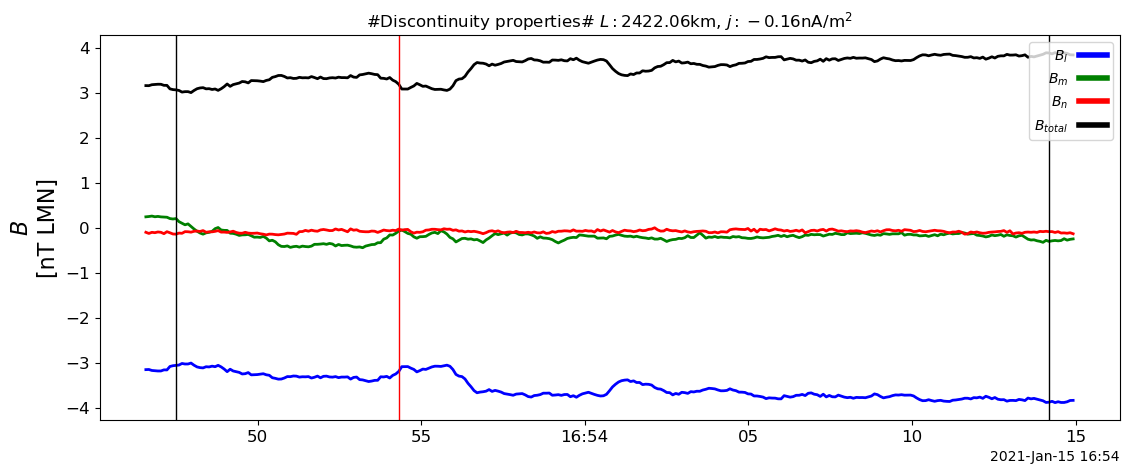

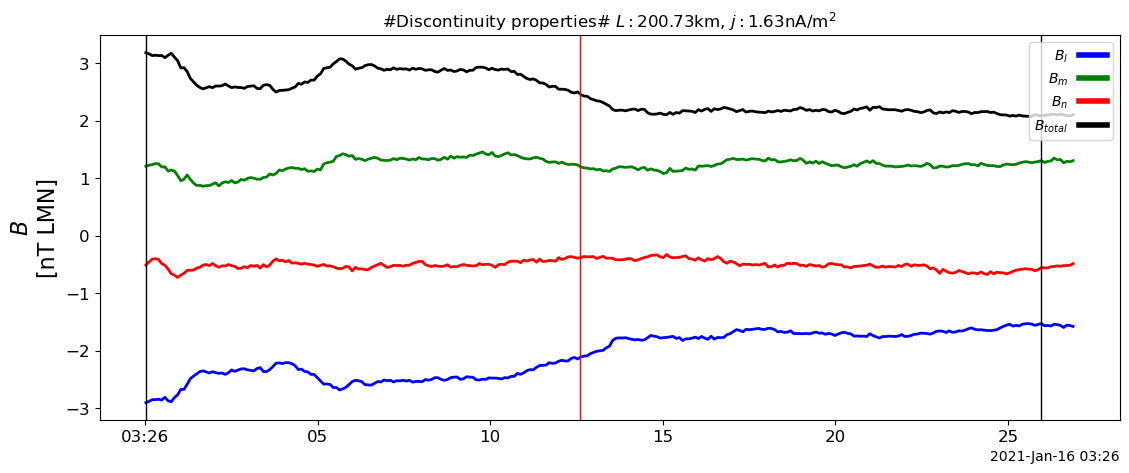

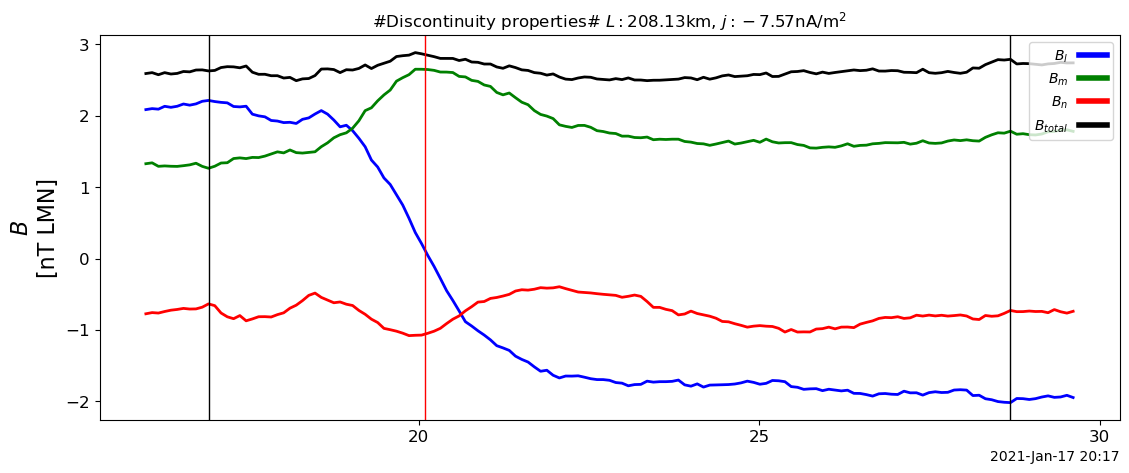

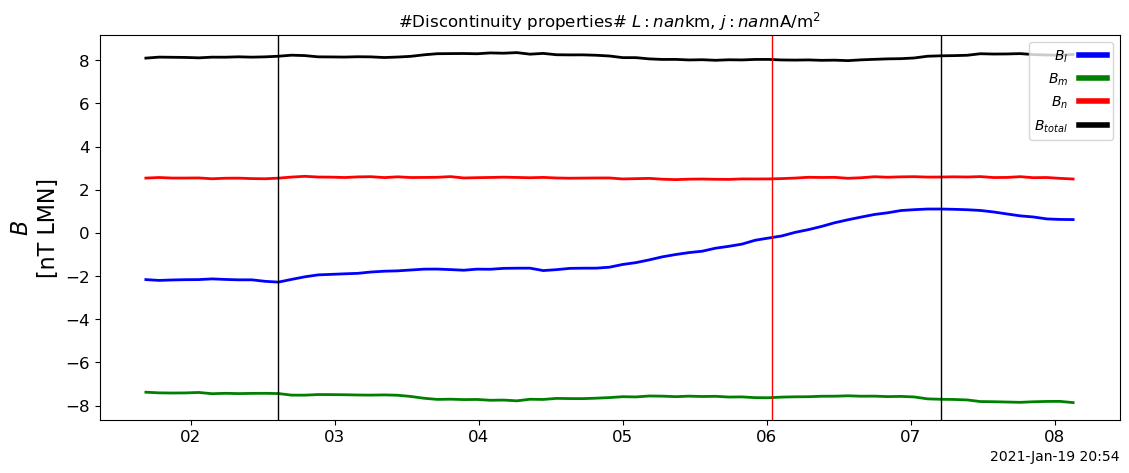

In [34]:
w_conf = WindConfig(enc=enc).get_data().find_events()
plot_candidates(w_conf)

## Themis Examples

24-Aug-24 20:49:47: Can't get THB_L2_MOM/thb_peim_densityQ without web service, switching to web service
24-Aug-24 20:49:47: Can't get THB_L2_MOM/thb_peim_velocity_gseQ without web service, switching to web service
24-Aug-24 20:49:47: Can't get THB_L2_MOM/thb_peim_ptotQ without web service, switching to web service
24-Aug-24 20:49:47: Can't get THB_L2_MOM/thb_peim_densityQ without web service, switching to web service
24-Aug-24 20:49:47: Can't get THB_L2_MOM/thb_peim_velocity_gseQ without web service, switching to web service
24-Aug-24 20:49:47: Can't get THB_L2_MOM/thb_peim_ptotQ without web service, switching to web service
2024-08-24 20:49:47.299 | INFO     | discontinuitypy.utils.plot:plot_candidates:265 - Candidates indices: [217 182 318 225]


[(<Figure size 1200x500 with 1 Axes>,
  [<Axes: title={'center': '#Discontinuity properties# $L: 320.62 \\mathrm{km}$, $j: 3.94 \\mathrm{nA/m}^2$'}, ylabel='$B$\n[nT LMN]'>]),
 (<Figure size 1200x500 with 1 Axes>,
  [<Axes: title={'center': '#Discontinuity properties# $L: 191.30 \\mathrm{km}$, $j: -2.40 \\mathrm{nA/m}^2$'}, ylabel='$B$\n[nT LMN]'>]),
 (<Figure size 1200x500 with 1 Axes>,
  [<Axes: title={'center': '#Discontinuity properties# $L: 1841.91 \\mathrm{km}$, $j: 1.15 \\mathrm{nA/m}^2$'}, ylabel='$B$\n[nT LMN]'>]),
 (<Figure size 1200x500 with 1 Axes>,
  [<Axes: title={'center': '#Discontinuity properties# $L: 1271.68 \\mathrm{km}$, $j: -1.00 \\mathrm{nA/m}^2$'}, ylabel='$B$\n[nT LMN]'>])]

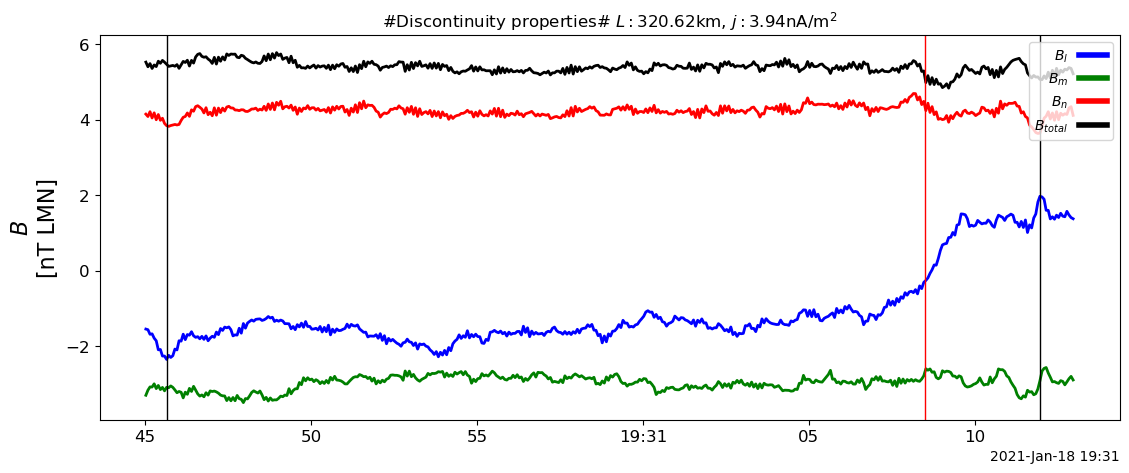

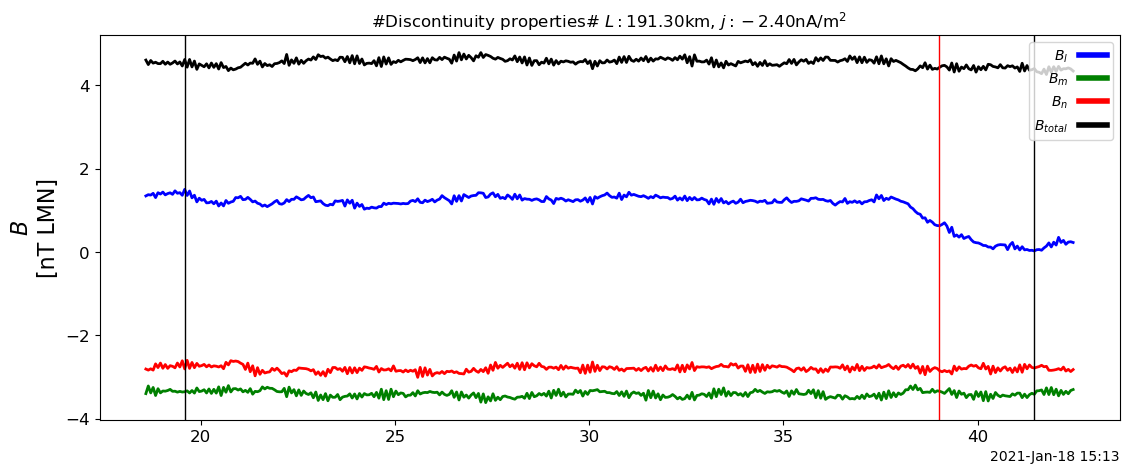

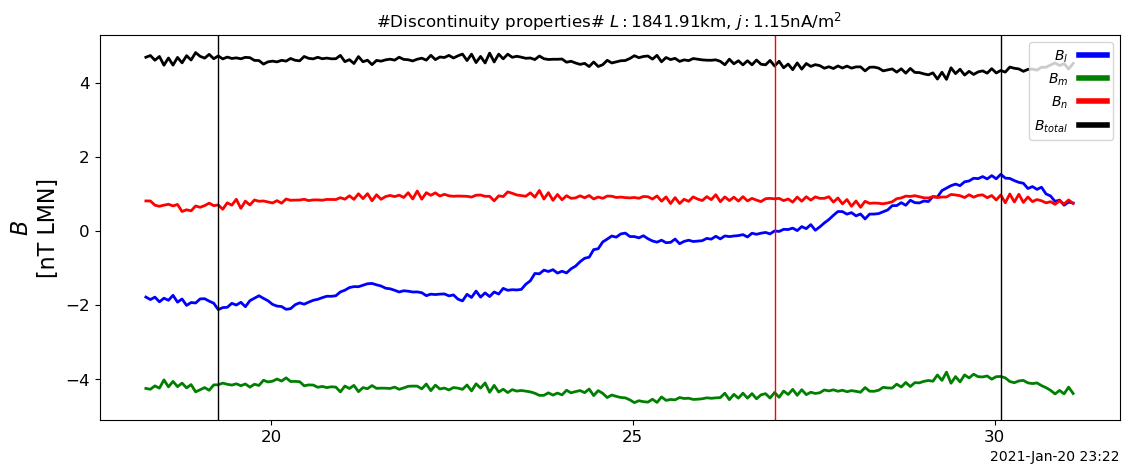

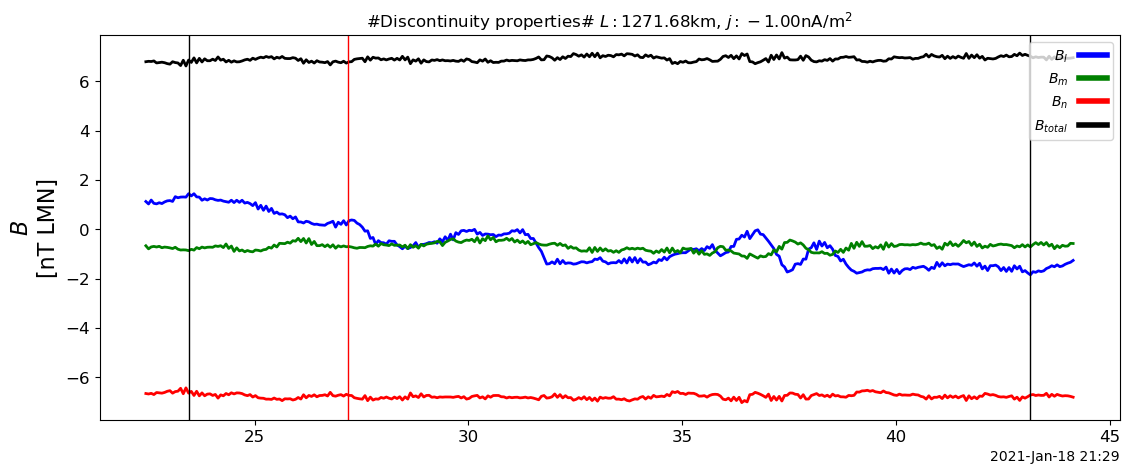

In [21]:
thm_conf = THEMISConfig(enc=enc).get_data().find_events()
plot_candidates(thm_conf)